# Project: Wrangling and Analyze Data

In [1]:
#importing the necessary libaries for this project

import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and loaded them in the notebook. **Note:** the methods required to gather each data are different.
1. I directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# using pandas to read the csv file
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# the url where the data is located is specified below
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# using request to download the dataset
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# using pandas to read the csv file downloaded
df2= pd.read_csv('image-predictions.tsv', sep='\t')
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

 The cell below loads the data via Twitter API, but according to Twitter rules my cosunmer key, consumer secret, access token, and access secret must be kept a secret. Hence, their values in asterisks.

In [5]:
consumer_key = '****'
consumer_secret = '****'
access_token = '***'
access_secret = '****'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# making a list of the tweet id values and getting the length 
tweet_id_list = df1.tweet_id.values
len(tweet_id_list)

2356

Twitter returns a JSON format for each tweet requested. The cell below converts the JSON into a txt file, for scalability. Also, some tweets won't load (most likely deleted), and are therefore saved into a dictionary.

In [8]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id_list:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

The loaded data in the txt file is made a list and appended into a dataframe as shown in the cell below.

In [7]:
df_list = []

with open ('tweet_json.txt', mode='r') as file:
    for line in file:
        data= json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id':int(tweet_id),
                      'retweet_count': int(retweet_count),
                      'favorite_count': int(favorite_count)})

In [8]:
# the dataframe is loaded and displayed
df3 = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7001,33804
1,892177421306343426,5299,29318
2,891815181378084864,3477,22041
3,891689557279858688,7224,36926
4,891327558926688256,7754,35302
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Assessing Data
In this section, I detected and documented **eight (8) quality issues and two (2) tidiness issue**. Which I assessed **both** visually and
programmatically.

The three datasets loaded before now are all related, and would therefore be merged into one. This is a tidiness issue and would be listed as one in the Tidiness section further down the notebook.

In [9]:
# importing functools to merge all datasets
from functools import reduce

In [10]:
df_join =[df1,df2,df3]

In [11]:
# using the lambda function to merge the dataset
df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df_join)
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7001,33804


In [12]:
# quick information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

From the information of the dataframe displayed above, some quality issues can be identified such as; the timestamp column is in object format, ideally it should be in datetime format.The 'tweet_id' column should be in string format not integer format. It also shows that the 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id' column has too many null values. The column name should be floof not floofer according to the dog dictionary.

In [13]:
# returns the first five rows of the dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7001,33804
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5299,29318
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22041
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7224,36926
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754,35302


Visually assessing the table, some other quality issues can be seen such as; the source column as displayed above looks messy and clusters the table. 

In [14]:
# returns all entries for columns p1, p2 and p3
df.iloc[:, [19, 22, 25]]

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
...,...,...,...
2052,miniature_pinscher,Rottweiler,Doberman
2053,Rhodesian_ridgeback,redbone,miniature_pinscher
2054,German_shepherd,malinois,bloodhound
2055,redbone,miniature_pinscher,Rhodesian_ridgeback


Also, visually assesing the type of dogs in columns p1, p2 and p3 it shows both lower and uppercase letters, this is a quality issue.

In [15]:
# returns unique values of the rating numerator column
set(df['rating_numerator'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 24,
 26,
 27,
 44,
 45,
 50,
 60,
 75,
 80,
 84,
 88,
 99,
 121,
 143,
 144,
 165,
 204,
 420,
 1776}

From the unique values displayed in the rating numerator column, some values appear not to be a realistic ratings over 10. This is a quality issue that need handling.

In [16]:
set(df['rating_denominator'])

{2, 7, 10, 11, 20, 40, 50, 70, 80, 90, 110, 120, 130, 150, 170}

The rating denominator column should have a consistent value of 10. But the unique values in this column says otherwise, it needs to be cleaned.

In [17]:
df.iloc[:, 13:17]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2052,None,None,None,None
2053,None,None,None,None
2054,None,None,None,None
2055,None,None,None,None


The 'doggo','floofer','pupper' and 'puppo' columns have so many 'None' values, this is because these columns should ideally be an observation, not a column. This is a tidiness issue that needs handling.

### Quality issues
1. The timestamp column should be in datetime format not object format.

2. Retweet values in row dropped.

3. The 'tweet_id' column should be in string format not integer format.

4. The 'floofer' column should be renamed to 'floof'.

5. The 'source' column looks too messy and clusters the table, will be dropped.
     
6. The type of dogs in p1, p2 and p3 column contains both lower and uppercase letters, needs to be handled.

7. The 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id' column has too many null values, and won't be relevant to this analysis, it will be dropped.

8. Incorrect ratings in columns fixed.

### Tidiness issues
1. The 'doggo', 'floof', 'pupper', 'puppo' column should not be a column because it is an observation.

2. The three datasets will be merged into one, because it is relational data.


## Cleaning Data
In this section, I cleaned **all** of the issues I documented while assessing. 

In [18]:
# Make copies of original pieces of data
df_copy=df.copy()
df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7001,33804
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5299,29318
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22041
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7224,36926
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754,35302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,37,89
2053,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115,247
2054,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
2055,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112


### Issue #1:

#### Define: The timestamp column will be converted from object format into a datetime format.

#### Code

In [19]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

In [20]:
df_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7001,33804


#### Test

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2057 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2057 non-null   datetime64[ns, UTC]
 4   source                      2057 non-null   object             
 5   text                        2057 non-null   object             
 6   retweeted_status_id         71 non-null     float64            
 7   retweeted_status_user_id    71 non-null     float64            
 8   retweeted_status_timestamp  71 non-null     object             
 9   expanded_urls               2057 non-null   object             
 10  rating_numerator            2057 non-null   int64           

### Issue #2:

#### Define: Retweet values in row dropped.

#### Code

In [22]:
# Drop retweeted rows
df_copy = df_copy[df_copy.retweeted_status_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_user_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_timestamp.isnull()]

#### Test

In [23]:
# Check if the retweets have been droped
print(df_copy.retweeted_status_id.notnull().sum())
print(df_copy.retweeted_status_user_id.notnull().sum())
print(df_copy.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #3:

#### Define: Convert 'tweet_id' column from int format to string format.

#### Code

In [24]:
df_copy['tweet_id'] = df_copy['tweet_id'].astype('str')

#### Test

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1986 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1986 non-null   datetime64[ns, UTC]
 4   source                      1986 non-null   object             
 5   text                        1986 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1986 non-null   object             
 10  rating_numerator            1986 non-null   int64           

### Issue #4:

#### Define: The 'floofer' column should be renamed to 'floof

#### Code

In [26]:
df_copy.rename(columns={'floofer':'floof'}, inplace=True)

#### Test

In [27]:
df_copy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7001,33804


### Issue #5:

#### Define: The 'source' column looks too messy and clusters the table, will be dropped.

#### Code

In [28]:
df_copy.drop('source', axis=1, inplace=True)

#### Test

In [29]:
df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7001,33804
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5299,29318
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22041
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7224,36926
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7754,35302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,37,89
2053,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115,247
2054,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
2055,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112


### Issue #6:

#### Define: The type of dogs in p1, p2 and p3 column contains both lower and uppercase letters, needs to be handled.

#### Code: 

In [30]:
df_copy['p1'] = df_copy['p1'].str.lower()
df_copy['p2'] = df_copy['p2'].str.lower()
df_copy['p3'] = df_copy['p3'].str.lower()

#### Test:

In [31]:
df_copy.p1.head()

0         orange
1      chihuahua
2      chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object

In [32]:
df_copy.p2.head()

0                 bagel
1              pekinese
2              malamute
3    labrador_retriever
4      english_springer
Name: p2, dtype: object

In [33]:
df_copy.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    german_short-haired_pointer
Name: p3, dtype: object

### Issue #7:

#### Define: 2. Dropping the  'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and  'in_reply_to_user_id' column.

#### Code

In [34]:
df_copy.drop(df.columns[[1,2,6,7,8]], axis=1, inplace=True)

#### Test:

In [35]:
df_copy.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7001,33804


### Issue #8:

#### Define: Incorrect ratings in columns fixed.

#### Code

In [36]:
df_copy['rating_numerator'].unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420], dtype=int64)

In [37]:
df_copy['rating_denominator'].unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2], dtype=int64)

In [38]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   text                1986 non-null   object             
 3   expanded_urls       1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   doggo               1986 non-null   object             
 8   floof               1986 non-null   object             
 9   pupper              1986 non-null   object             
 10  puppo               1986 non-null   object             
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

In [39]:
#resets the index
df_copy.reset_index(inplace=True, drop=True)

In [40]:
# to check for ratings with decimals incorrectly extracted, by viewing the text column
df_copy[df_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].style.set_properties(subset=['text'], **{'width-min': '300px'})

C:\Users\DELL\AppData\Local\Temp\ipykernel_6444\340324999.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_copy[df_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].style.set_properties(subset=['text'], **{'width-min': '300px'})


,text,rating_numerator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
548,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1367,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [41]:
# replacing the numerator ratings with the correct value
df_copy.iloc[39, 4] = 13.5
df_copy.iloc[499, 4] = 9.75
df_copy.iloc[548, 4] = 11.27
df_copy.iloc[1367, 4] = 11.26

In [42]:
# returns a dataframe that matches text with multiple rating entries or not
a = df_copy.text.str.extractall(r"(\d+\d*\/\d+)")
a.head(5)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10


In [43]:
# returns a dataframe that matches text with multiple rating entries
match = a.query("match == 1")
match.head()

,,0
,match,
550,1,11/10
742,1,7/10
793,1,14/10
884,1,13/10
918,1,11/10


In [44]:
# returns the indexes of the above dataframe
match.index.values.tolist()

[(550, 1),
 (742, 1),
 (793, 1),
 (884, 1),
 (918, 1),
 (934, 1),
 (1055, 1),
 (1145, 1),
 (1150, 1),
 (1185, 1),
 (1200, 1),
 (1211, 1),
 (1321, 1),
 (1442, 1),
 (1476, 1),
 (1538, 1),
 (1542, 1),
 (1607, 1),
 (1647, 1),
 (1700, 1),
 (1749, 1),
 (1812, 1),
 (1849, 1),
 (1894, 1),
 (1903, 1),
 (1936, 1),
 (1965, 1)]

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   text                1986 non-null   object             
 3   expanded_urls       1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   doggo               1986 non-null   object             
 8   floof               1986 non-null   object             
 9   pupper              1986 non-null   object             
 10  puppo               1986 non-null   object             
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

In [47]:
# reading the text column visually for proper cleaning
df_copy.iloc[[550, 742, 793, 884, 918, 934, 1055, 1145, 1150, 1185, 1200, 1211, 1321, 1442, 1476, 1538, 1542, 1607, 1647, 1700, 1749, 1812, 1849, 1903, 1936, 1965], [2,4,5]].style.set_properties(subset=['text'], **{'width-min': '300px'})

,text,rating_numerator,rating_denominator
550,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.000000,10
742,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.000000,10
793,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.000000,11
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.000000,20
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.000000,50
934,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp https://t.co/Akzl5ynMmE,10.000000,10
1055,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.000000,10
1145,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.000000,10
1150,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10 https://t.co/6NgsQJuSBJ,10.000000,10
1185,When bae says they can't go out but you see them with someone else that same night. 5/10 & 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.000000,10


In [49]:
# replacing the numerator and denominator ratings with the correct value
df_copy.iloc[793, 4] = 14
df_copy.iloc[793, 5] = 10

df_copy.iloc[884, 4] = 13
df_copy.iloc[884, 5] = 10

df_copy.iloc[918, 4] = 11
df_copy.iloc[918, 5] = 10

df_copy.iloc[1321, 4] = 10
df_copy.iloc[1321, 5] = 10

df_copy.iloc[1965, 4] = 9
df_copy.iloc[1965, 5] = 10

#### Test:

In [50]:
df_copy.iloc[[39, 499,548,1367,550, 742, 793, 884, 918, 934, 1055, 1145, 1150, 1185, 1200, 1211, 1321, 1442, 1476, 1538, 1542, 1607, 1647, 1700, 1749, 1812, 1849, 1903, 1936, 1965], [2,4,5]].style.set_properties(subset=['text'], **{'width-min': '300px'})

,text,rating_numerator,rating_denominator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.500000,10
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.750000,10
548,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.270000,10
1367,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.260000,10
550,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.000000,10
742,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.000000,10
793,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.000000,10
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.000000,10
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.000000,10
934,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp https://t.co/Akzl5ynMmE,10.000000,10


In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   text                1986 non-null   object             
 3   expanded_urls       1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   doggo               1986 non-null   object             
 8   floof               1986 non-null   object             
 9   pupper              1986 non-null   object             
 10  puppo               1986 non-null   object             
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

The rating numerator column is already in data type float.

### Tidiness Issues 

### Issue #9:

#### Define:  The 'doggo', 'floof', 'pupper', 'puppo' column should not be a column because it is an observation,and will be made a new column called 'dog_stages'

#### Code:

In [52]:
# replaces all 'none' values in each specified columns with empty values

df_copy.doggo.replace('None', '', inplace=True)
df_copy.floof.replace('None', '', inplace=True)
df_copy.pupper.replace('None', '', inplace=True)
df_copy.puppo.replace('None', '', inplace=True)

In [53]:
# concatenate the doggo, floof, pupper and puppo column into one named 'dog_stage'
df_copy['dog_stage'] = df_copy.doggo + df_copy.floof + df_copy.pupper + df_copy.puppo
df_copy.dog_stage.value_counts()

                1681
pupper           203
doggo             62
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [54]:
# replace double entry values with the correct dog types seperated by a comma.

df_copy.loc[df_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_copy.loc[df_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_copy.loc[df_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'


In [55]:
# returns the value count of the dog stage column
df_copy.dog_stage.value_counts()

                 1681
pupper            203
doggo              62
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [56]:
# drop the specifed dog type columns
df_copy.drop(['doggo', 'floof', 'pupper', 'puppo'], axis=1, inplace=True)

In [57]:
# replace other irrelevant values with nan values
df_copy['dog_stage'] = df_copy['dog_stage'].replace('', np.nan)
df_copy['dog_stage'] = df_copy['dog_stage'].replace('49.04', np.nan)
df_copy['dog_stage'] = df_copy['dog_stage'].replace('40', np.nan)

#### Test:

In [58]:
df_copy.head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,7001,33804,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,5299,29318,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22041,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7224,36926,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7754,35302,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,...,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,2600,17804,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,...,True,border_collie,0.199287,True,ice_lolly,0.193548,False,1660,10346,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,...,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,15750,56845,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,...,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,3617,24514,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,6096,27947,doggo


### Issue #10:

#### Define: The three datasets will be merged into one, because it is relational data.

#### Code:

The dataset was merged before the cleaning operation began. The code to the merging can be found in cells 9, 10 and 11 of this notebook.

#### Test:

In [59]:
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,7001,33804


## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
# save the clean dataset into a csv file
df_copy.to_csv("twitter_archive_master.csv", index=False)

In [61]:
df_clean = pd.read_csv("twitter_archive_master.csv")

In [62]:
# returns the first 10 rows of the cleaned dataset
df_clean.head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,7001,33804,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,5299,29318,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,3477,22041,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7224,36926,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7754,35302,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,...,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,2600,17804,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,...,True,border_collie,0.199287,True,ice_lolly,0.193548,False,1660,10346,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,...,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,15750,56845,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,...,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,3617,24514,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,...,True,cardigan,0.451038,True,chihuahua,0.029248,True,6096,27947,doggo


## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled and clean data. I produced **three (3) insights and two (2) visualization.**

In [63]:
# quick statistical summary of the clean dataset
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1.986000e+03,1986.000000,1986.000000
mean,7.356142e+17,12.231007,10.512085,1.203424,0.593452,1.344853e-01,6.034994e-02,2242.210977,7706.950151
std,6.740686e+16,41.544680,7.276068,0.561492,0.271961,1.005944e-01,5.091948e-02,4016.627067,11370.339110
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.758214e+17,10.000000,10.000000,1.000000,0.362656,5.407533e-02,1.624755e-02,494.500000,1636.250000
50%,7.082494e+17,11.000000,10.000000,1.000000,0.587357,1.175370e-01,4.952715e-02,1079.000000,3463.000000
75%,7.873791e+17,12.000000,10.000000,1.000000,0.844920,1.951377e-01,9.166433e-02,2556.750000,9556.250000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70689.000000,144829.000000


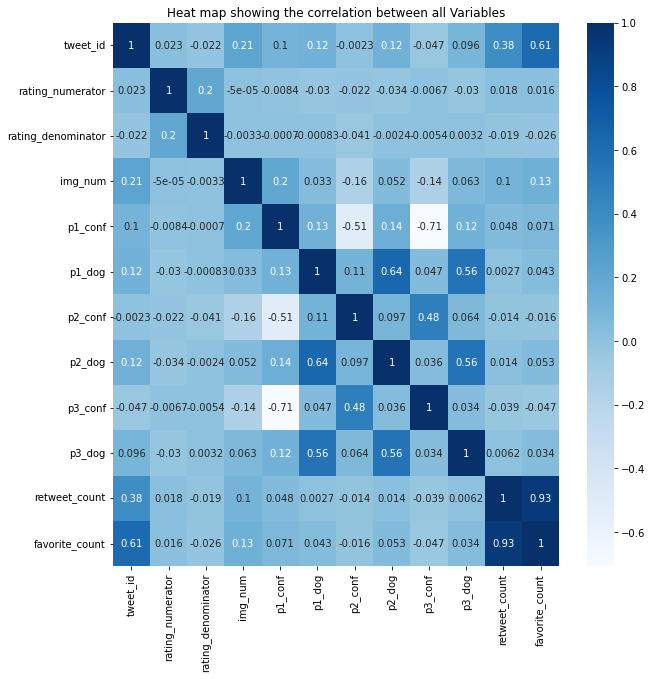

In [64]:
# plots a heat map showing the correlation between alll the variables

plt.figure(figsize=(10,10))
sns.heatmap(df_clean.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heat map showing the correlation between all Variables');

### Insights:
1. The value of the minimum, first quartile, median, third quartile and the maximum favorite count is higher than that of the respective retweet count, I can infer that people generally like to favorite a tweet than retweet it.

2. From the heat map displayed above, we can see that there is a strong correlation between the retweet_count and favorite count columns, with correlation value of 0.93

3. The standard deviation of the rating_numerator column is 41.544680.

### Visualization

#### 1. Is the relationship between the retweet_count and the favorite_count a positive or negative one?

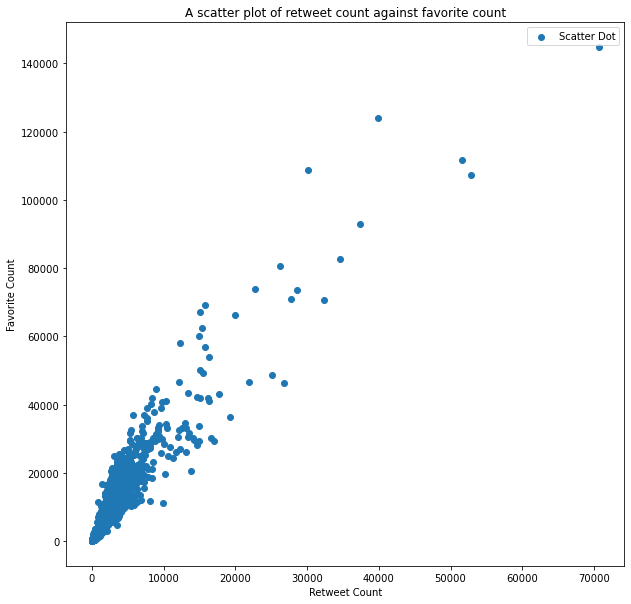

In [65]:
# returns a scatter plot showing the relationship between the retweet_count and the favorite_count

plt.figure(figsize=(10,10))
plt.scatter(x='retweet_count',y='favorite_count',data=df_clean, label='Scatter Dot')
plt.title('A scatter plot of retweet count against favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.legend(loc='best');

There is a positive correlation between them.